In [1]:
import tensorflow as tf
import networkx as nx
import numpy as np

import data.input_samples as inpu
import models.graph_nn as grap
import util.plotting as plut

In [2]:
# input sample

club_dict = {'Mr. Hi' : 0, 
             'Officer': 1}

G = nx.karate_club_graph()
X = np.eye(G.number_of_nodes(), dtype=np.float32) # featureless graph
A = nx.to_numpy_array(G)
A_tilde = inpu.normalized_adjacency(A)
club_labels = nx.get_node_attributes(G,'club')
y = np.array([club_dict[label] for label in club_labels.values()])

In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

In [5]:
# model 
gnn = grap.GraphAutoencoderKarate(nodes_n=G.number_of_nodes(), feat_sz=G.number_of_nodes(), activation=tf.nn.tanh)
z = gnn.encoder((X, A_tilde))

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input_features (InputLa [(None, 34, 34)]     0                                            
__________________________________________________________________________________________________
encoder_input_adjacency (InputL [(None, 34, 34)]     0                                            
__________________________________________________________________________________________________
graph_convolution (GraphConvolu (None, 34, 4)        136         encoder_input_features[0][0]     
                                                                 encoder_input_adjacency[0][0]    
__________________________________________________________________________________________________
graph_convolution_1 (GraphConvo (None, 34, 4)        16          graph_convolution[0][0

In [6]:
z

<tf.Tensor: shape=(34, 2), dtype=float32, numpy=
array([[-0.12434261,  0.16047457],
       [-0.0558176 ,  0.15942731],
       [-0.04103905,  0.1399769 ],
       [-0.05337781,  0.12651588],
       [-0.12745826,  0.07354503],
       [-0.15602823,  0.08971115],
       [-0.15301162,  0.0993403 ],
       [-0.04177022,  0.11423071],
       [-0.02497749,  0.09300618],
       [-0.01222453,  0.06735329],
       [-0.12849411,  0.06926917],
       [-0.02292669, -0.00288611],
       [-0.0479493 ,  0.06422028],
       [-0.04290736,  0.11369717],
       [-0.00733414,  0.0882359 ],
       [-0.0176228 ,  0.05565526],
       [-0.13853796,  0.08391979],
       [-0.03231885,  0.09384978],
       [-0.01122743,  0.03652246],
       [-0.04400934,  0.08385676],
       [-0.00744238,  0.04279735],
       [-0.0405368 ,  0.08581184],
       [-0.00103296,  0.05507021],
       [-0.00539618,  0.07327684],
       [ 0.00188698,  0.00746201],
       [-0.00120074,  0.01271893],
       [-0.01423608,  0.10133584],
      

In [7]:
z.shape

TensorShape([34, 2])

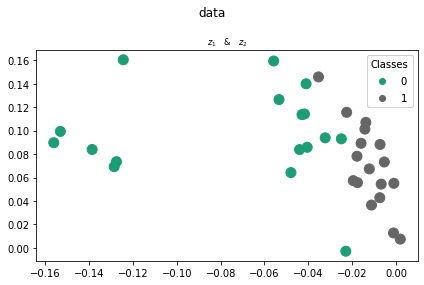

In [8]:
plut.plot_clusters(z, y)